# Lab Deep Learning / Multi-Layer Perceptron for binary-classification / in pytorch


## Objective:

The objective of this lab is to develop a two hidden layers MLP to perform **binary classification**.

We will use a MLP with 2 hidden layer with $n_{h1}=20$ and $n_{h2}=10$ hidden units and ```relu``` activation functions.
You will perform 10.000 iterations (epochs) of SGD to find the parameters.

Note: in this lab, we do not separate the dataset into a train, validation and test part.

### Data normalization

You should normalize the data to zero mean and unit standard deviation

### Model

There are various ways to write NN model in pytorch.

In this lab, you will write three different implementations:
- **Model A**: manually defining the parameters (W1,b1,W2,b2,W3,b3), writing the forward equations, writting the loss equation, calling the .backward() and manually updating the weights using W1.grad. You will write the loop to perform 1000 epochs.
- **Model B**: using the Sequential class of pytorch
- **Model C**: a custom torch.nn.Module class for this.

For Model B and C, you will use the ready made loss and optimization from the nn and optim packages. You can use the same code to optimize the parameters of Model B and C.

### Loss

Since we are dealing with a binary classification problem, we will use a Binary Cross Entropy loss (use ```torch.nn.BCELoss``` for Model B and C).

### Parameters update/ Optimization

For updating the parameters, we will use as optimizer a simple SGD algorithm (use ```torch.optim.SGD``` for Model B and C) with a learning rate of 0.1.

Don't forget that an optimizer is applied to a set of parameters (```my_model.parameters()``` gives the parameters of the network for Model B and C).
Once the gradients have been computed (after the backpropagation has been performed), you can perform one step of optimization (using ```optimizer.step()``` for Model B and C).

### Backward propagation

Backpropagation is automatically performed in pytorch using the ```autograd``` package.
First, reset the gradients of all parameters (using ```optimizer.zero_grad()``` for Model B and C), then perform the backpropagation ```loss.backward()```.

## Load the python packages

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)

2.2.2


## Dataset

We take the usual circle dataset from sklearn.

In [3]:
from sklearn import datasets

X_np, y_np = datasets.make_circles(n_samples=1000, noise=0.2, factor=0.5)

We convert the ```numpy tensors``` to ```torch tensors```.
The difference being that the latters allows to do automatic gradient differentiation (back-propagation).

In [4]:
X = torch.from_numpy(X_np).float()
y = torch.from_numpy(y_np).float()
y = y.view(len(y), 1)

In [5]:
print(X.size())
print(y.size())
print(X.mean(dim=0))
print(X.std(dim=0))

torch.Size([1000, 2])
torch.Size([1000, 1])
tensor([ 0.0140, -0.0009])
tensor([0.5903, 0.5881])


## Normalization

In [6]:
X -= X.mean(dim=0)
X /= X.std(dim=0)
print(X.mean(dim=0))
print(X.std(dim=0))

tensor([1.7166e-08, 2.2888e-08])
tensor([1.0000, 1.0000])


## Definition of the hyper-parameters

In [7]:
n_in = X.shape[1]
n_h1 = 20
n_h2 = 10
n_out = 1

nb_epoch = 10000
alpha = 0.1

## Model 1 (writing the network equations)




### Parameter initialization

In [8]:
# --- We first initialize the variables of the network (W1, b1, ...)
W1 = torch.randn(n_in, n_h1) * np.sqrt(
    2 / n_in
)  # He initialization for ReLU activation
W1.requires_grad = True
b1 = torch.zeros(1, n_h1)
b1.requires_grad = True

W2 = torch.randn(n_h1, n_h2) * np.sqrt(2 / n_h1)
W2.requires_grad = True
b2 = torch.zeros(1, n_h2)
b2.requires_grad = True

W3 = torch.randn(n_h2, n_out) * np.sqrt(2 / n_h2)
W3.requires_grad = True
b3 = torch.zeros(1, n_out)
b3.requires_grad = True

### Define the model

We write a function to perform the forward pass (using pytorch operators, not numpy operators) taking X as input and returing hat_y as output.

In [9]:
def model(X):
    A0 = X  # (m, n_in)
    Z1 = A0 @ W1 + b1  # (m, n_h1)
    A1 = F.relu(Z1)  # (m, n_h1)
    Z2 = A1 @ W2 + b2  # (m, n_h2)
    A2 = F.relu(Z2)  # (m, n_h2)
    Z3 = A2 @ W3 + b3  # (m, n_out)
    A3 = F.sigmoid(Z3)  # (m, n_out)
    hat_y = A3  # (m, n_out)
    return hat_y

### Main training loop

We iterate over epochs (we do not perform split into mini-batch here).
For each iteration, we
- a) perform the forward pass,
- b) compute the loss/cost,
- c) compute the backward pass to get the gradients of the cost w.r.t. the parameters W1, b1, ...
- d) perform the update of the parameters W1, b1, ...

***Important: pytorch restriction***
When you update the parameters (W1, b1, ...) but subtracting a small part of the gradient, you should that ``inplace`` (W1 -= ??? and not W1 = W1 - ???). Otherwise pytorch will overide W1 by its value (it will eras its .grad filed).


epoch 0, loss 0.8280677199363708
epoch 500, loss 0.27256646752357483
epoch 1000, loss 0.2688530683517456
epoch 1500, loss 0.2679075002670288
epoch 2000, loss 0.2666282057762146
epoch 2500, loss 0.26589375734329224
epoch 3000, loss 0.2653098404407501
epoch 3500, loss 0.26468625664711
epoch 4000, loss 0.2641525864601135
epoch 4500, loss 0.26367804408073425
epoch 5000, loss 0.26324978470802307
epoch 5500, loss 0.2626532316207886
epoch 6000, loss 0.2622520625591278
epoch 6500, loss 0.26174217462539673
epoch 7000, loss 0.2613368034362793
epoch 7500, loss 0.26093438267707825
epoch 8000, loss 0.260308176279068
epoch 8500, loss 0.2596692740917206
epoch 9000, loss 0.2590882182121277
epoch 9500, loss 0.25854912400245667


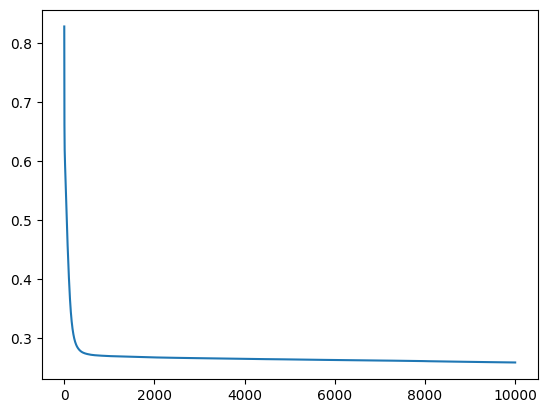

In [10]:
loss_l = []
for num_epoch in range(0, nb_epoch):

    # --- a) Forward pass: X (n_in, m), hat_y (n_out, m)
    hat_y = model(X)

    # -- We clip hat_y in order to avoid log(0) in the loss
    eps = 1e-10
    hat_y = torch.clamp(hat_y, eps, 1 - eps)

    # --- b) Computing the loss/cost
    loss = -(y * torch.log(hat_y) + (1 - y) * torch.log(1 - hat_y))
    cost = torch.mean(loss)
    loss_l.append(cost.item())

    if num_epoch % 500 == 0:
        print("epoch {}, loss {}".format(num_epoch, cost))

    # --- c) Backward pass
    cost.backward()

    # --- "with torch.no_grad()" temporarily set all the requires_grad flag to false
    with torch.no_grad():
        # --- d) perform the update of the parameters W1, b1, ...
        # --- the gradients dLoss/dW1 is stored in W1.grad, dLoss/db1 is stored in b1.grad, ...
        W1 -= alpha * W1.grad
        b1 -= alpha * b1.grad
        W2 -= alpha * W2.grad
        b2 -= alpha * b2.grad
        W3 -= alpha * W3.grad
        b3 -= alpha * b3.grad

    # --- We need to set to zero all gradients (otherwise they are cumulated)
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()
    W3.grad.zero_()
    b3.grad.zero_()
plt.plot(loss_l)

## Model 2 (using nn.sequential)

In [11]:
my_model = nn.Sequential(
    nn.Linear(n_in, n_h1, bias=True),
    nn.ReLU(),
    nn.Linear(n_h1, n_h2, bias=True),
    nn.ReLU(),
    nn.Linear(n_h2, n_out, bias=True),
    nn.Sigmoid(),
)

### Criterion and Optimization

The code of Model 1 is self-contained, i.e. it already contains all necessary instruction to perform forward, loss, backward and parameter updates.

When using ```nn.sequential``` (model 2) or a class definition of the network (model 3), we still need to define
- what we will minimize (the loss to be minimized, i.e. Binary-Cross-Entropy). We can of course write the equation of it by hand but pytorch comes with a very large number of pre-build loss functions (within ```torch.nn```)
- how we will minimize the loss, i.e. what parameter update algorithms we will use (SGD, momentum). We can of course write the equation of it by hand but pytorch comes with a very large number of pre-build loss functions (within ```torch.nn```)

In [12]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(my_model.parameters(), lr=alpha)

### Main training loop

Having defined the network, the citerion to be minimized and the optimizer, we then perform a loop over epochs (iterations); at each step we
- compute the forward pass by passing the data to the model: ```haty = model(x)```
- compute the the loss (the criterion)
- putting at zero the gradients of all the parameters of the network (this is important since, by default, pytorch accumulate the gradients over time)
- computing the backpropagation (using as before ```.backward()```)
- performing one step of optimization (using ```.step()```)

epoch 0, loss 0.7053613662719727
epoch 500, loss 0.2760152220726013
epoch 1000, loss 0.26883968710899353
epoch 1500, loss 0.26741456985473633
epoch 2000, loss 0.26668214797973633
epoch 2500, loss 0.2659991681575775
epoch 3000, loss 0.26549413800239563
epoch 3500, loss 0.2651091516017914
epoch 4000, loss 0.264676570892334
epoch 4500, loss 0.26440221071243286
epoch 5000, loss 0.2640993595123291
epoch 5500, loss 0.26317498087882996
epoch 6000, loss 0.26281407475471497
epoch 6500, loss 0.26251348853111267
epoch 7000, loss 0.2622354030609131
epoch 7500, loss 0.26195767521858215
epoch 8000, loss 0.261660099029541
epoch 8500, loss 0.2613145709037781
epoch 9000, loss 0.26100948452949524
epoch 9500, loss 0.2606844902038574


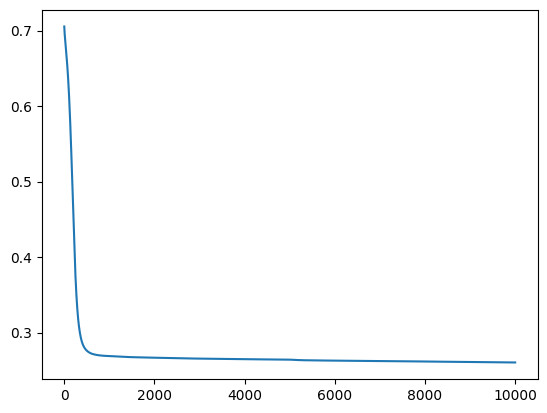

In [13]:
loss_l = []
for num_epoch in range(nb_epoch):

    hat_y = my_model(X)
    loss = criterion(hat_y, y)
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()  # perform back-propagation
    optimizer.step()  # update the weights

    loss_l.append(loss.item())

    if num_epoch % 500 == 0:
        print("epoch {}, loss {}".format(num_epoch, loss.item()))

# ----------------
plt.plot(loss_l)

## Model 3 (using a class definition)

In [14]:
class Net(torch.nn.Module):
    def __init__(self, n_in, n_h1, n_h2, n_out):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(n_in, n_h1)  # hidden layer 1
        self.fc2 = nn.Linear(n_h1, n_h2)  # hidden layer 2
        self.fc3 = nn.Linear(n_h2, n_out)  # output layer

    def forward(self, X):

        A0 = X
        A1 = F.relu(self.fc1(A0))  # activation function for hidden layer 1
        A2 = F.relu(self.fc2(A1))  # activation function for hidden layer 2
        A3 = F.sigmoid(self.fc3(A2))  # activation function for output layer

        return A3


my_model = Net(n_in, n_h1, n_h2, n_out)

### Criterion and Optimization (same as for model 2 -> copy and paste your code)

In [15]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(my_model.parameters(), lr=alpha)

### Main training loop (same as for model 2 -> copy and paste your code)


epoch 0, loss 0.6916719675064087
epoch 500, loss 0.2748135030269623
epoch 1000, loss 0.2698673605918884
epoch 1500, loss 0.2684815526008606
epoch 2000, loss 0.26729121804237366
epoch 2500, loss 0.2662915289402008
epoch 3000, loss 0.2659358084201813
epoch 3500, loss 0.26565027236938477
epoch 4000, loss 0.2653915584087372
epoch 4500, loss 0.26516759395599365
epoch 5000, loss 0.2649748623371124
epoch 5500, loss 0.26481637358665466
epoch 6000, loss 0.26467591524124146
epoch 6500, loss 0.264546662569046
epoch 7000, loss 0.2644270956516266
epoch 7500, loss 0.26431119441986084
epoch 8000, loss 0.26420336961746216
epoch 8500, loss 0.26409995555877686
epoch 9000, loss 0.2640007436275482
epoch 9500, loss 0.26390430331230164


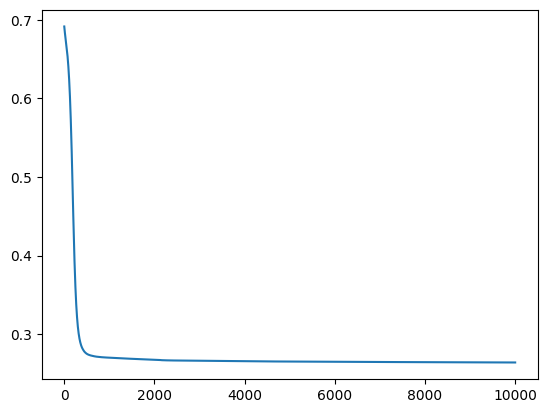

In [16]:
loss_l = []
for num_epoch in range(nb_epoch):

    hat_y = my_model(X)  # Forward pass: Compute predicted y by passing  x to the model
    loss = criterion(hat_y, y)  # Compute loss
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()  # re-init the gradients (otherwise they are cumulated)
    loss.backward()  # perform back-propagation
    optimizer.step()  # update the weights

    loss_l.append(loss.item())

    if num_epoch % 500 == 0:
        print("epoch {}, loss {}".format(num_epoch, loss.item()))

# ----------------
plt.plot(loss_l)